<a href="https://colab.research.google.com/github/MDMarufHossain07/Brain-Tumor-Detection/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra..
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import glob as gb
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,BatchNormalization ,Flatten
from keras.models import Sequential,Model
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from zipfile import ZipFile
file_name= "archive.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print()


In [ ]:
os.listdir('brain_tumor_dataset')

['yes', 'no']

In [ ]:
paths ={
        'path' :'D:\Projects\Brain Tumor',
        'train':'brain_tumor_dataset',
        'test' :'D:\Projects\Brain Tumor'
        }

In [ ]:
def get_size(path):
    x =[]
    for folder in os.listdir(path):
       
        files = gb.glob(pathname=str(path+'/'+folder+'/*.jpg'))
        
        for file in files:
            img = plt.imread(file)
           
            x.append(img.shape)
    return x

In [ ]:
train_size =get_size(paths['train'])
pd.Series(train_size).value_counts()

(225, 225, 3)    17
(630, 630, 3)     5
(251, 201, 3)     5
(325, 300)        4
(217, 232, 3)     3
                 ..
(380, 318, 3)     1
(246, 205, 3)     1
(222, 227, 3)     1
(890, 700, 3)     1
(218, 180, 3)     1
Length: 115, dtype: int64

In [ ]:
code ={'no':0,'yes':1}
def Load_Label_Data(path,image_size):
    x = []
    y = []
    for folder in os.listdir(path):
        files = gb.glob(pathname=path+'/'+folder+'/*.jpg')
        for file in files:
            img = cv.imread(file)
            img = cv.resize(img,(image_size,image_size))
            x.append(list(img))
            del img
            y.append(code[folder])
    x = np.array(x)
    y = np.array(y) 
    x,y = shuffle(x,y)
    return x , y

In [ ]:
image_size = 224
X , y = Load_Label_Data(paths['train'],image_size)

Text(0.5, 1.0, '1')

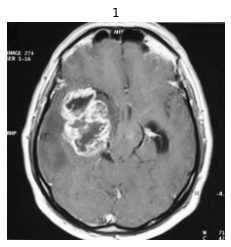

In [ ]:
plt.imshow(X[0])
plt.axis('off')
plt.title(y[0])

In [ ]:
X_train,X_test , y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
print('y Train before Shape : ', y_train.shape )
y_train = keras.utils.to_categorical(y_train,num_classes=2)
print('y Train after Shape : ', y_train.shape )
print('y Test before Shape : ', y_test.shape )
y_test= keras.utils.to_categorical(y_test,num_classes=2)
print('y Test after Shape : ', y_test.shape )

y Train before Shape :  (136,)
y Train after Shape :  (136, 2)
y Test before Shape :  (35,)
y Test after Shape :  (35, 2)


In [ ]:
from zipfile import ZipFile
file_name= "archive2.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print()


In [ ]:
my_model = keras.models.load_model('vgg16-95-accuracy-brain.h5')

In [ ]:
my_model.summary()

In [ ]:
for layer in my_model.layers[:-1]:
    layer.trainable =False
my_model.fit(X_train,y_train,epochs=5,validation_split=.2,verbose=1)

Epoch 1/5
4/4 [==============================] - 62s 15s/step - loss: 0.8030 - accuracy: 0.8519 - val_loss: 1.2172 - val_accuracy: 0.4643
Epoch 2/5
4/4 [==============================] - 60s 15s/step - loss: 1.8288 - accuracy: 0.6667 - val_loss: 0.3848 - val_accuracy: 0.9643
Epoch 3/5
4/4 [==============================] - 60s 15s/step - loss: 0.1312 - accuracy: 0.9815 - val_loss: 0.4218 - val_accuracy: 0.9643
Epoch 4/5
4/4 [==============================] - 60s 15s/step - loss: 0.0332 - accuracy: 0.9907 - val_loss: 0.3781 - val_accuracy: 0.9643
Epoch 5/5
4/4 [==============================] - 60s 15s/step - loss: 0.0392 - accuracy: 0.9907 - val_loss: 0.2914 - val_accuracy: 0.9286


In [ ]:
my_model.evaluate(X_test,y_test)

2/2 [==============================] - 16s 1s/step - loss: 0.0454 - accuracy: 0.9714


[0.04542142152786255, 0.9714285731315613]

In [ ]:
y_hat = my_model.predict(X_test)

In [ ]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(y_hat,axis=1)))

In [ ]:
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_hat,axis=1)))

[[15  0]
 [ 1 19]]
